In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
df = pd.read_csv("indian_food(in).csv")

In [40]:
print(df.info)
print(df.dtypes)

<bound method DataFrame.info of      food_id            name  \
0          1      Balu shahi   
1          2          Boondi   
2          3  Gajar ka halwa   
3          4          Ghevar   
4          5     Gulab jamun   
..       ...             ...   
250      251       Til Pitha   
251      252         Bebinca   
252      253          Shufta   
253      254       Mawa Bati   
254      255          Pinaca   

                                           ingredients        diet  prep_time  \
0                      Maida flour, yogurt, oil, sugar  vegetarian       45.0   
1                              Gram flour, ghee, sugar  vegetarian       80.0   
2         Carrots, milk, sugar, ghee, cashews, raisins  vegetarian       15.0   
3    Flour, ghee, kewra, milk, clarified butter, su...  vegetarian       15.0   
4    Milk powder, plain flour, baking powder, ghee,...  vegetarian       15.0   
..                                                 ...         ...        ...   
250            G

In [41]:
df =df.replace("", pd.NA)
# print(df.tail(10))
print("---------")
df = df.replace(-1, pd.NA)
df = df.replace("-1", pd.NA)

---------


In [42]:
x1 = df.columns[df.isnull().any()].tolist()
# print(df.tail(10))
print(x1)
print(df.isnull().sum())

['prep_time', 'cook_time', 'flavor_profile', 'state', 'region']
food_id            0
name               0
ingredients        0
diet               0
prep_time         32
cook_time         28
flavor_profile    29
course             0
state             33
region            14
dtype: int64


In [43]:
spicy_ing = df[df["flavor_profile"] == "spicy"]["ingredients"].tolist()
sweet_ing = df[df["flavor_profile"] == "sweet"]["ingredients"].tolist()
bitter_ing = df[df["flavor_profile"] == "bitter"]["ingredients"].tolist()
sour_ing = df[df["flavor_profile"] == "sour"]["ingredients"].tolist()

# print(spicy_ids)

new_spicy_ing = []
for i in spicy_ing :
    for j in [sweet_ing,bitter_ing,sour_ing]  :
        if i not in j :
            new_spicy_ing.append(i)


new_sweet_ing = []
for i in sweet_ing :
    for j in [spicy_ing,bitter_ing,sour_ing] :
        if i not in j :
            new_sweet_ing.append(i)

        
new_bitter_ing = []           
for i in bitter_ing :
    for j in [sweet_ing,spicy_ing,sour_ing]  :
        if i not in j :
            new_bitter_ing.append(i)

            
new_sour_ing = []
for i in sour_ing :
    for j in [sweet_ing,bitter_ing,spicy_ing]  :
        if i not in j :
            new_sour_ing.append(i)
            
            

df = df.fillna({
    "prep_time": df['prep_time'].mean(),
    "cook_time": df['cook_time'].mean(),
    "diet": "U3",
    "flavor_profile": "U4"
})

flavor_p = df[df["flavor_profile"] == "U4"]["ingredients"].tolist() 

non_veg_items = [
    "chicken", "mutton", "fish", "pork", "egg", 
    "beef", "prawns", "shrimp", "crab", "shellfish",
    "lamb", "bacon", "ham", "duck", "turkey"
]


dit_p = df[df["diet"] == "U3"]["ingredients"].tolist() 

x1 = ""
for i in flavor_p :
    if i in new_sour_ing :
        x1 += "sour"
        break
    elif i in new_bitter_ing :
        x1 += "bitter"
        break
    elif i in new_sweet_ing :
        x1 += "sweet"
        break
    else:
        x1 += "spicy"
        break

    

df =df.replace("U4", x1)

if dit_p in non_veg_items :
    df =df.replace("U3", "non vegetarian")
else :
    df =df.replace("U3", "vegetarian")

    


df = df.infer_objects(copy=False)
print(df.tail(10))

     food_id               name  \
245      246         Pani Pitha   
246      247             Payokh   
247      248  Prawn malai curry   
248      249           Red Rice   
249      250             Shukto   
250      251          Til Pitha   
251      252            Bebinca   
252      253             Shufta   
253      254          Mawa Bati   
254      255             Pinaca   

                                           ingredients            diet  \
245  Tea leaves, white sesame seeds, dry coconut, s...      vegetarian   
246  Basmati rice, rose water, sugar, clarified but...      vegetarian   
247      Coconut milk, prawns, garlic, turmeric, sugar  non vegetarian   
248  Red pepper, red onion, butter, watercress, oli...      vegetarian   
249  Green beans, bitter gourd, ridge gourd, banana...      vegetarian   
250            Glutinous rice, black sesame seeds, gur      vegetarian   
251  Coconut milk, egg yolks, clarified butter, all...      vegetarian   
252  Cottage cheese, d

/var/folders/sy/m7k6mw5s73vb6glpqkq98gyr0000gn/T/ipykernel_1441/3683868233.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna({


In [44]:
x1 = df.columns[df.isnull().any()].tolist()
# print(df.tail(10))
print(x1)
print(df.isnull().sum())




['state', 'region']
food_id            0
name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile     0
course             0
state             33
region            14
dtype: int64


In [45]:
#replace state and region U1 and U2 value 

import random
df = df.fillna({
    "state": "U1",
    "region": "U2"
})

id_s = df[df["state"] == "U1"]["food_id"].tolist()
id_r = df[df["region"] == "U2"]["food_id"].tolist()

North = [
    "Jammu & Kashmir",
    "Punjab",
    "Uttarakhand",
    "Haryana",
    "Uttar Pradesh",
    "Rajasthan",
    "NCT of Delhi"  
]

South = [
    "Andhra Pradesh",
    "Telangana",
    "Karnataka",
    "Tamil Nadu",
    "Kerala",  
]

East = [
    "Bihar",
    "Odisha",
    "West Bengal"
]

West = [
    "Goa",
    "Gujarat",
    "Maharashtra",
]

Central = [
    "Madhya Pradesh",
    "Chhattisgarh"
]

NorthEast = [
    "Assam",
    "Nagaland",
    "Tripura",
]
region_all = ["North East" , "Central" , "West" , "East" , "South" , "North"]


for i in id_r :
    random_region = random.choice(region_all)
    df.loc[df['food_id'] == i, 'region'] = random_region
    
for i in id_s :
    x1 = df[df["food_id"] == i]["region"].tolist()
    x2 = x1[0]
    if x2 == "North East" :
        random_state = random.choice(NorthEast)
    elif x2 == "North" :
        random_state = random.choice(North)
    elif x2 == "East" :
        random_state = random.choice(East)
    elif x2 == "West" :
        random_state = random.choice(West)
    elif x2 == "Central" :
        random_state = random.choice(Central)
    elif x2 == "South" :
        random_state = random.choice(South)

    df.loc[df['food_id'] == i, 'state'] = random_state
    
print("Done")



Done


In [46]:
print(df.tail(10))
x1 = df.columns[df.isnull().any()].tolist()
# print(df.tail(10))
print(x1)
print(df.isnull().sum())

     food_id               name  \
245      246         Pani Pitha   
246      247             Payokh   
247      248  Prawn malai curry   
248      249           Red Rice   
249      250             Shukto   
250      251          Til Pitha   
251      252            Bebinca   
252      253             Shufta   
253      254          Mawa Bati   
254      255             Pinaca   

                                           ingredients            diet  \
245  Tea leaves, white sesame seeds, dry coconut, s...      vegetarian   
246  Basmati rice, rose water, sugar, clarified but...      vegetarian   
247      Coconut milk, prawns, garlic, turmeric, sugar  non vegetarian   
248  Red pepper, red onion, butter, watercress, oli...      vegetarian   
249  Green beans, bitter gourd, ridge gourd, banana...      vegetarian   
250            Glutinous rice, black sesame seeds, gur      vegetarian   
251  Coconut milk, egg yolks, clarified butter, all...      vegetarian   
252  Cottage cheese, d

In [47]:
# Numerical Analysis

# On prep_time and cook_time:

# Calculate minimum

# Maximum

# Mean

# Median

# Standard deviation


print("Prep Time Statistics :")
print(f"Minimum prep_time: {df['prep_time'].min()}")
print(f"Maximum prep_time: {df['prep_time'].max()}")
print(f"Mean prep_time: {df['prep_time'].mean()}")
print(f"Median prep_time: {df['prep_time'].median()}")
print(f"Standard Deviation of prep_time: {df['prep_time'].std()}")
print("\nCook Time Statistics : ")

print(f"Minimum cook_time: {df['cook_time'].min()}")
print(f"Maximum cook_time: {df['cook_time'].max()}")
print(f"Mean cook_time: {df['cook_time'].mean()}")
print(f"Median cook_time: {df['cook_time'].median()}")
print(f"Standard Deviation of cook_time: {df['cook_time'].std()}")

Prep Time Statistics :
Minimum prep_time: 5.0
Maximum prep_time: 500.0
Mean prep_time: 35.63677130044843
Median prep_time: 15.0
Standard Deviation of prep_time: 71.55372351127573

Cook Time Statistics : 
Minimum cook_time: 2.0
Maximum cook_time: 720.0
Mean cook_time: 38.91189427312775
Median cook_time: 30.0
Standard Deviation of cook_time: 46.618160678654796


In [48]:

print(df.select_dtypes(include='number'))


     food_id  prep_time  cook_time
0          1  45.000000  25.000000
1          2  80.000000  30.000000
2          3  15.000000  60.000000
3          4  15.000000  30.000000
4          5  15.000000  40.000000
..       ...        ...        ...
250      251   5.000000  30.000000
251      252  20.000000  60.000000
252      253  35.636771  38.911894
253      254  20.000000  45.000000
254      255  35.636771  38.911894

[255 rows x 3 columns]


<Axes: >

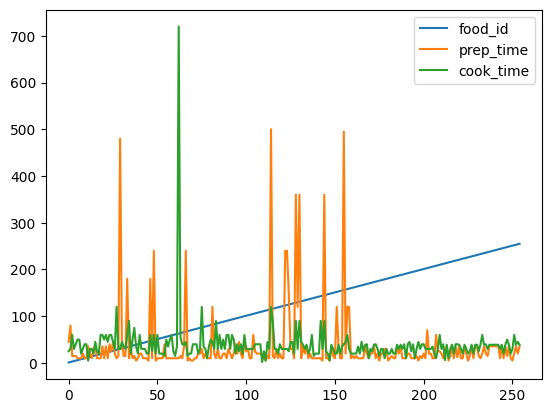

In [49]:
df.plot()

In [50]:
plt.show()

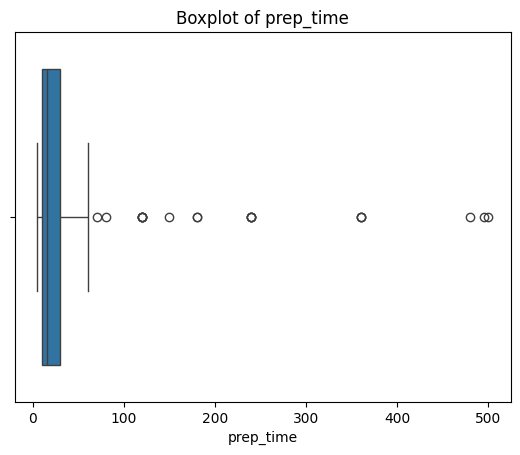

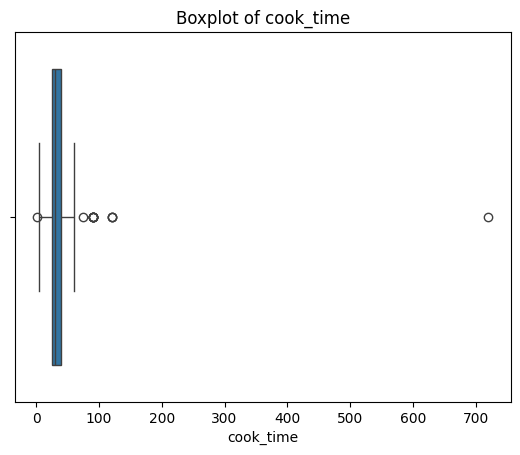

In [51]:
numeric_features = ['prep_time','cook_time']
for col in numeric_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")


In [52]:

# Calculate Q1, Q3, and IQR for prep_time
Q1 = df['prep_time'].quantile(0.25)
Q3 = df['prep_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound_1 = Q1 - 1.5 * IQR
upper_bound_1 = Q3 + 1.5 * IQR

# Boolean mask
is_outlier_1 = (df['prep_time'] < lower_bound_1) | (df['prep_time'] > upper_bound_1)

# Print outliers (optional)
print("Prep Time Outliers:")
print(df[is_outlier_1])

# FIX -- replace outliers with median
median_prep = df['prep_time'].median()
df.loc[is_outlier_1, 'prep_time'] = median_prep

print("Prep Time Outliers Fixed.")
print("-------------")

# Calculate Q1, Q3, and IQR for cook_time
Q2 = df['cook_time'].quantile(0.25)
Q5 = df['cook_time'].quantile(0.75)
IQR_cook = Q5 - Q2

# Define bounds
lower_bound_2 = Q2 - 1.5 * IQR_cook
upper_bound_2 = Q5 + 1.5 * IQR_cook

# Boolean mask
is_outlier_2 = (df['cook_time'] < lower_bound_2) | (df['cook_time'] > upper_bound_2)

# Print outliers (optional)
print("Cook Time Outliers:")
print(df[is_outlier_2])

# FIX - replace outliers with median
median_cook = df['cook_time'].median()
df.loc[is_outlier_2, 'cook_time'] = median_cook

print("Cook Time Outliers Fixed.")


Prep Time Outliers:
     food_id                 name  \
1          2               Boondi   
29        30            Misti doi   
33        34            Ras malai   
46        47       Obbattu holige   
48        49             Poornalu   
66        67       Chak Hao Kheer   
81        82        Chicken Tikka   
114      115          Pindi chana   
122      123     Tandoori Chicken   
123      124  Tandoori Fish Tikka   
124      125                 Attu   
128      129                 Dosa   
129      130             Idiappam   
130      131                 Idli   
144      145          Masala Dosa   
151      152            Pesarattu   
155      156                Puttu   
157      158              Sandige   
158      159                Sevai   
202      203    Sabudana Khichadi   

                                           ingredients            diet  \
1                              Gram flour, ghee, sugar      vegetarian   
29                                       Milk, jaggery

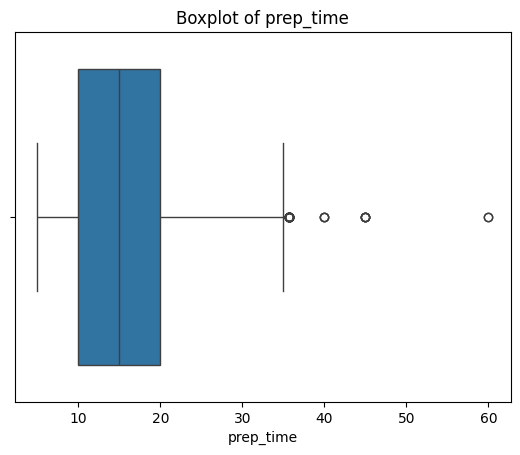

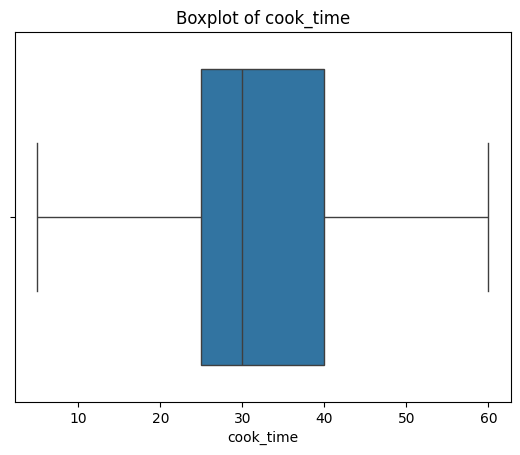

In [53]:
numeric_features = ['prep_time','cook_time']
for col in numeric_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")


<Axes: >

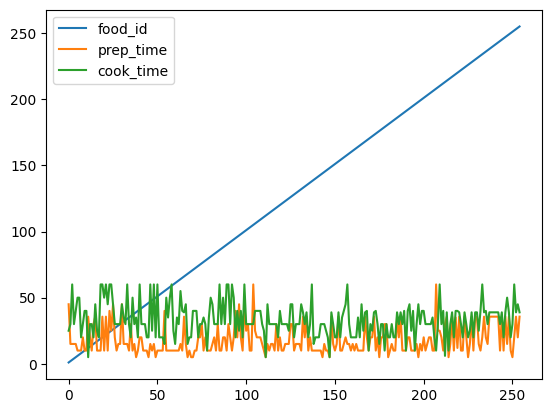

In [54]:
df.plot()

In [55]:
# ## **2. Encode Categorical Data**

# Your dataset likely includes columns like:

# * Cuisine
# * Diet (Veg/Non-Veg)
# * Course (Snack, Dessert, Main Course)
# * Region/State
# * Name (not needed for encoding)

# ### **Tasks**

# * Decide which encoding to apply:

#   * **One-Hot Encoding** → for columns with few categories (e.g., Diet).
#   * **Label Encoding** → for large category columns (e.g., Cuisine, Region).
# * Drop irrelevant columns (e.g., description text) if they cannot be encoded.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

drop_cols = ["name", "description"]  # change based on your dataset
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

one_hot_cols = ["diet", "course"]   # columns with few categories

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)


label_cols = ["cuisine", "region"]   # large unique values

le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))


print(df.head())
print("\nEncoded Columns:", df.columns)


   food_id                                        ingredients  prep_time  \
0        1                    Maida flour, yogurt, oil, sugar       45.0   
1        2                            Gram flour, ghee, sugar       15.0   
2        3       Carrots, milk, sugar, ghee, cashews, raisins       15.0   
3        4  Flour, ghee, kewra, milk, clarified butter, su...       15.0   
4        5  Milk powder, plain flour, baking powder, ghee,...       15.0   

   cook_time flavor_profile        state  region  diet_non vegetarian  \
0       25.0          sweet  West Bengal       1                False   
1       30.0          sweet    Rajasthan       5                False   
2       60.0          sweet       Punjab       2                False   
3       30.0          sweet    Rajasthan       5                False   
4       40.0          sweet  West Bengal       1                False   

   diet_vegetarian  course_dessert  course_main course  course_snack  \
0             True            Tr

In [56]:
# ## **3. Normalize / Scale Numerical Features**

# You must scale numerical columns so models work better.

# ### **Tasks**

# * Identify numerical columns:

#   * Cooking time
#   * Prep time
#   * Total time
#   * Rating
#   * Number of ingredients
# * Choose scaling method:

#   * **StandardScaler (Z-score)** → values become mean=0, std=1
#   * **MinMaxScaler (0–1 range)** → values scaled between 0 and 1
# * Apply scaling **after** splitting the data.



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler





num_cols = [
    "cook_time",
    "prep_time",
    "total_time",
    "rating",
    "num_ingredients"
]


num_cols = [col for col in num_cols if col in df.columns]

print("Numerical Columns:", num_cols)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


scaler = StandardScaler()      #  Use Z-score scaling
# scaler = MinMaxScaler()      # Use 0–1 range scaling

scaler.fit(train_df[num_cols])

train_df[num_cols] = scaler.transform(train_df[num_cols])
val_df[num_cols]   = scaler.transform(val_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])


print("\nScaled Training Data (head):")
print(train_df.head())




Numerical Columns: ['cook_time', 'prep_time']

Scaled Training Data (head):
     food_id                                        ingredients  prep_time  \
106      107  Cottage cheese, palak, cream, garam masala, bu...   0.252303   
182      183  Bottle gourd, green, raisins, sugar, clarified...  -0.234763   
186      187  Bottle gourd, chana dal, cabbage, urad dal, to...   0.252303   
245      246  Tea leaves, white sesame seeds, dry coconut, s...  -0.721829   
135      136     Greens, tomato, mustard seeds, fenugreek seeds  -0.721829   

     cook_time flavor_profile       state  region  diet_non vegetarian  \
106   0.528465          spicy      Punjab       2                False   
182  -0.260787          sweet     Gujarat       5                False   
186  -0.260787          spicy     Gujarat       5                False   
245  -1.050040          spicy       Assam       3                False   
135  -1.050040          spicy  Tamil Nadu       4                False   

     diet_

<Axes: >

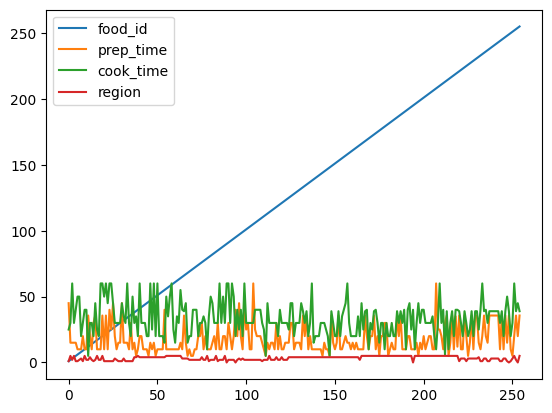

In [57]:
df.plot()

In [58]:
print(df.columns)
print(df.dtypes)


Index(['food_id', 'ingredients', 'prep_time', 'cook_time', 'flavor_profile',
       'state', 'region', 'diet_non vegetarian', 'diet_vegetarian',
       'course_dessert', 'course_main course', 'course_snack',
       'course_starter'],
      dtype='object')
food_id                  int64
ingredients             object
prep_time              float64
cook_time              float64
flavor_profile          object
state                   object
region                   int64
diet_non vegetarian       bool
diet_vegetarian           bool
course_dessert            bool
course_main course        bool
course_snack              bool
course_starter            bool
dtype: object


In [59]:

# ## **4. Split the Dataset**

# ### **Tasks**

# Split into:

# * **70% Train**
# * **15% Validation**
# * **15% Test**

# ### **What each set is used for**

# * **Train:** Train the ML model
# * **Validation:** Tune hyperparameters, choose best model
# * **Test:** Final accuracy check



from sklearn.model_selection import train_test_split

# Choose your target
target_column = "flavor_profile"   # <-- change if needed

X = df.drop(target_column, axis=1)
y = df[target_column]

# 70% Train, 30% Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Split 30% Temp → 15% Val + 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (178, 12)
Validation: (38, 12)
Test: (39, 12)


In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Fit only on train
X_train_processed = preprocessor.fit_transform(X_train)

# Transform validation & test
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Processed shapes:")
print("Train:", X_train_processed.shape)
print("Validation:", X_val_processed.shape)
print("Test:", X_test_processed.shape)


Numeric columns: Index(['food_id', 'prep_time', 'cook_time', 'region'], dtype='object')
Categorical columns: Index(['ingredients', 'state', 'diet_non vegetarian', 'diet_vegetarian',
       'course_dessert', 'course_main course', 'course_snack',
       'course_starter'],
      dtype='object')
Processed shapes:
Train: (178, 216)
Validation: (38, 216)
Test: (39, 216)
